# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Using-sklearn.preprocessing" data-toc-modified-id="Using-sklearn.preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using sklearn.preprocessing</a></div><div class="lev1 toc-item"><a href="#Using-scipy.stats" data-toc-modified-id="Using-scipy.stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using scipy.stats</a></div><div class="lev2 toc-item"><a href="#Box-Cox-Transformation" data-toc-modified-id="Box-Cox-Transformation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Box-Cox Transformation</a></div><div class="lev2 toc-item"><a href="#Yeo-Johnson-Transformation" data-toc-modified-id="Yeo-Johnson-Transformation-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Yeo-Johnson Transformation</a></div>

In [7]:
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

# Using sklearn.preprocessing

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

Note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.

Power Transformations

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png)

In [27]:
import sklearn

sklearn.__version__, sklearn.__version__[0:4]

('0.18.1', '0.18')

In [28]:
if ( float(sklearn.__version__[:4]) >= 0.20):

    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer()
    data = [[1, 2], [3, 2], [4, 5]]

    print(pt.fit(data))
    print(pt.lambdas_)
    print(pt.transform(data))


# Using scipy.stats
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html  

In [9]:
import scipy.stats as stats

## Box-Cox Transformation

The Box-Cox transform is given by:

```
y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0
```

boxcox requires the input data to be positive. 

Sometimes a Box-Cox transformation provides a shift parameter to achieve this; boxcox does not. 

Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.
Note: Input array x Should be 1-dimensional.

In [10]:
# log gamma random variates 
x = stats.loggamma.rvs(5, size=500) + 5

In [11]:
prob = stats.probplot(x, dist=stats.norm)

type(prob) # tuple

tuple

In [12]:
xt = prob[0][0]
xt.shape

(500,)

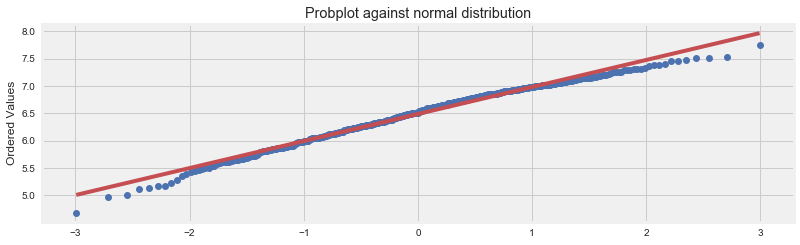

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

In [14]:
# We now use boxcox to transform the data so it’s closest to normal:

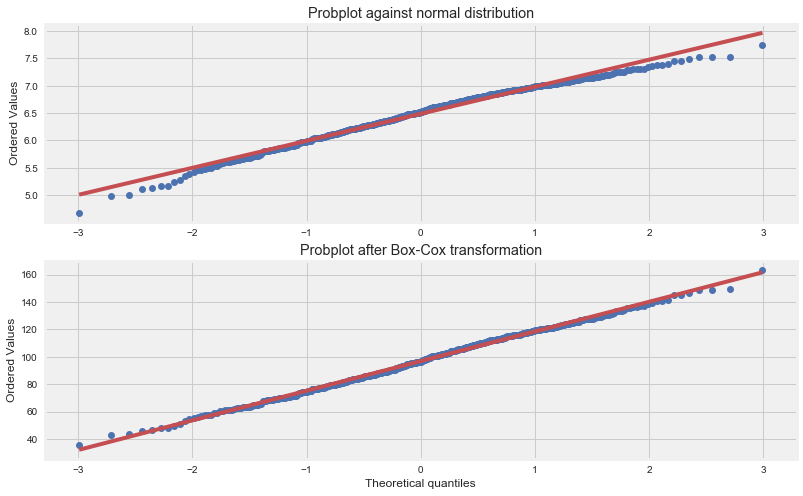

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

## Yeo-Johnson Transformation

The Yeo-Johnson transform is given by:

```
y = ((x + 1)**lmbda - 1) / lmbda,                for x >= 0, lmbda != 0
    log(x + 1),                                  for x >= 0, lmbda = 0
    -((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda),  for x < 0, lmbda != 2
    -log(-x + 1),                                for x < 0, lmbda = 2
```
Unlike boxcox, yeojohnson does not require the input data to be positive.

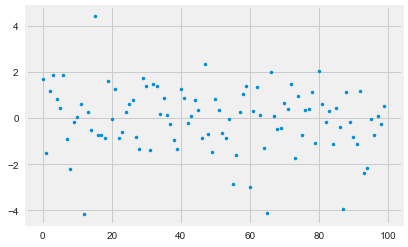

In [16]:
nsample = 100
np.random.seed(0)
x = stats.t.rvs(3, size=nsample)

plt.plot(x,'.')

[<matplotlib.text.Text at 0x1160ee4e0>, <matplotlib.text.Text at 0x1160db8d0>]

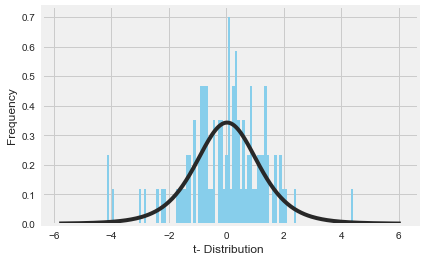

In [17]:
ax = sns.distplot(x,
                  bins=100,
                  kde=False, # make kde false it gives gaussian kde
                  fit = stats.t,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='t- Distribution ', ylabel='Frequency')
